<!-- Notebook Header Start -->

<h1 align="center">Spike Sorting</h1>

<p align="center">
  <strong>Author:</strong> Karl Bates<br>
  <strong>Date:</strong> 2024-11-18<br>
  <strong>Affiliation:</strong> Carnegie Mellon University, Cohen-Karni Lab  || Neuromechatronics Lab
</p>

---


## 📊 Notebook Outline

* **Data Import & Preprocessing**
* ****

## 📚 References & Additional Resources

- [Kilosort4 docs](https://github.com/MouseLand/Kilosort/tree/main)
- [SpikeInterface docs](https://github.com/SpikeInterface)

---

<!-- Notebook Header End -->


# 📈 Importing Libraries & Data
---

### imports

In [1]:
# standard imports
from pathlib import Path
import os
import pandas as pd
import numpy as np
from kilosort import io
import matplotlib.pyplot as plt

# custom imports
from automations import RM1
from automations import SpikeInterface_wrapper
from automations import Kilosort_wrapper

### probe definition

Using the spreadsheet, `Adapter_pinout.xlsx`, the contact ID's can be traced to the "device channel", and we can assign them on the probe. 

In this case, our channel indices correspond to the aux inputs to the intan headstage.

refer to the notebook, `RM1_pipeline.ipynb` within  the `dev_notebook` folder

In [2]:
# Path definitions

# save data to the inbox; make sure that the folders: binary & figures exist
SAVE_DIRECTORY = Path(fr'D:\Data\CMU.80 Data\88 Analyzed Data\88.002 Multi rat kilosort export\_inbox')  # NOTE Specify the path where the data will be copied to, and where Kilosort4 results will be saved.

# in this case, the data is saved in a folder with multiple rats
DATA_DIRECTORY = Path(fr'D:\Data\CMU.80 Data\82 External Data\82.002 Sample Rat Data from RM1 Project')  # NOTE Specify the path where the data will be copied to, and where Kilosort4 results will be saved.
# Create path if it doesn't exist
DATA_DIRECTORY.mkdir(parents=True, exist_ok=True)
SAVE_DIRECTORY.mkdir(parents=True, exist_ok=True)
PROBE_DIRECTORY = Path(r'D:\Data\CMU.80 Data\88 Analyzed Data\88.001 A1x32-Edge-5mm-20-177-A32\A1x32-Edge-5mm-20-177-A32.prb')

# 🔁 Example: Review of Every Trial in a Rat of Choice

This is used to determine which trial is most likely to produce good units in a spike sorting analysis

### filepath definitions

In [3]:
channel_mapping = pd.read_excel(r"D:\Data\CMU.80 Data\88 Analyzed Data\88.001 A1x32-Edge-5mm-20-177-A32\Adapter_pinout.xlsx",
                                sheet_name="summary",
                                header=2).iloc[:,[8,10,12,14]]
channel_mapping.head(5)

,A1x32 Probe.1,A32->O32 Adapter.1,Intan Board,Intan Input.1
0,32,32,T13,19
1,31,30,T14,20
2,30,31,B13,28
3,29,28,T15,21
4,28,29,B14,27


### importing the rat

In [4]:
Rat = RM1.Rat(DATA_DIRECTORY, PROBE_DIRECTORY, "DW327")

Reading DRGS_10_241125_150417...
Error reading stream 2 for DRGS_10_241125_150417. continuing...
Reading DRGS_11_241125_151101...
Error reading stream 2 for DRGS_11_241125_151101. continuing...
Reading DRGS_12_241125_151746...
Error reading stream 2 for DRGS_12_241125_151746. continuing...
Reading DRGS_1_241125_134024...
Error reading stream 2 for DRGS_1_241125_134024. continuing...
Reading DRGS_2_241125_140406...
Error reading stream 2 for DRGS_2_241125_140406. continuing...
Reading DRGS_3_241125_141057...
Error reading stream 2 for DRGS_3_241125_141057. continuing...
Reading DRGS_4_241125_141635...
Error reading stream 2 for DRGS_4_241125_141635. continuing...
Reading DRGS_5_241125_142348...
Error reading stream 2 for DRGS_5_241125_142348. continuing...
Reading DRGS_6_241125_143021...
Error reading stream 2 for DRGS_6_241125_143021. continuing...
Reading DRGS_7_241125_143654...
Error reading stream 2 for DRGS_7_241125_143654. continuing...
Reading DRGS_8_241125_144608...
Error readin

In [5]:
# for example, pulling the amp data from the 7th DRGS trial (only works for DW333)
# DW322.mat_files_dict["VF_DRG__145435"]["AM"]["amp"][0, 0][0, 0]

In [6]:
Rat.qst_experiment_notes

'd1 tl, d2 am sync, a1 am monitor,a2 evf'

In [7]:
Rat.drgs_trial_notes.head()

5,Trial Number,Condition,amp (uA),PW (us),Freq. (Hz),Dur. (s),Stimuli,Stage,Stimuli Dur.,rcrtrange,waitime,NaN
Trial Number,,,,,,,,,,,,
1,1,DRGS,63,300,5,180,pp,NaN,NaN,"61,67",30,named stv1testconfirm_11?
2,2,NaN,63,300,20,180,pp,NaN,NaN,"61,67",30,NaN
3,3,NaN,63,300,100,180,pp,NaN,NaN,"61,67",30,NaN
4,4,NaN,63,300,100,180,pp,NaN,NaN,"61,67",30,NaN
5,5,NaN,63,300,5,180,pp,NaN,NaN,"61,67",30,NaN


In [8]:
Rat.get_sc_data()
Rat.sc_data

{'DRGS_10_241125_150417': ChannelSliceRecording: 32 channels - 30.0kHz - 1 segments - 8,416,000 samples 
                        280.53s (4.68 minutes) - uint16 dtype - 513.67 MiB,
 'DRGS_11_241125_151101': ChannelSliceRecording: 32 channels - 30.0kHz - 1 segments - 8,508,160 samples 
                        283.61s (4.73 minutes) - uint16 dtype - 519.30 MiB,
 'DRGS_12_241125_151746': ChannelSliceRecording: 32 channels - 30.0kHz - 1 segments - 8,509,184 samples 
                        283.64s (4.73 minutes) - uint16 dtype - 519.36 MiB,
 'DRGS_1_241125_134024': ChannelSliceRecording: 32 channels - 30.0kHz - 1 segments - 2,837,248 samples 
                        94.57s (1.58 minutes) - uint16 dtype - 173.17 MiB,
 'DRGS_2_241125_140406': ChannelSliceRecording: 32 channels - 30.0kHz - 1 segments - 7,607,040 samples 
                        253.57s (4.23 minutes) - uint16 dtype - 464.30 MiB,
 'DRGS_3_241125_141057': ChannelSliceRecording: 32 channels - 30.0kHz - 1 segments - 7,706,368 sam

### process data for import into Kilosort

I will use a combination of `SpikeInterface` & `Kilosort.io.extractors` to get the data I need

In [9]:
signals = SpikeInterface_wrapper(Rat, SAVE_DIRECTORY)

Preparing SpikeInterface wrapper for rat DW327


can I just make new indices in the dictionary, and only save those values? that's pretty cool!

In [10]:
signals.save_spinalcord_data_to_binary(TRIAL_NAMES=["VF_8_241125_161626",
                                                     ])
# spikes.save_spinalcord_data_to_binary()

Data saved to D:\Data\CMU.80 Data\88 Analyzed Data\88.002 Multi rat kilosort export\_inbox\binary\VF_8_241125_161626\DW327_VF_8_241125_161626_data.bin


kilosort.run_kilosort: Kilosort version 4.0.20
kilosort.run_kilosort: Python version 3.9.20
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: System information:
kilosort.run_kilosort: Windows-10-10.0.19045-SP0 AMD64
kilosort.run_kilosort: AMD64 Family 23 Model 1 Stepping 1, AuthenticAMD
kilosort.run_kilosort: Using GPU for PyTorch computations. Specify `device` to change this.
kilosort.run_kilosort: Using CUDA device: NVIDIA GeForce GTX 1070 8.00GB
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: Sorting D:\Data\CMU.80 Data\88 Analyzed Data\88.002 Multi rat kilosort export\_inbox\binary\VF_8_241125_161626\DW327_VF_8_241125_161626_data.bin
kilosort.run_kilosort: Interpreting binary file as default dtype='int16'. If data was saved in a different format, specify `data_dtype`.
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing preprocessing variables.
kilosort.run_kilosort: ----------------------------------

Preparing Kilosort wrapper...
|
|
|
|
|
|
Running kilosort on VF_8_241125_161626
|
|
|
|
|
|


kilosort.run_kilosort: N samples: 7308032
kilosort.run_kilosort: N seconds: 243.60106666666667
kilosort.run_kilosort: N batches: 122
kilosort.run_kilosort: Preprocessing filters computed in  0.50s; total  0.50s
kilosort.run_kilosort:  
kilosort.run_kilosort: Resource usage after preprocessing
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort: CPU usage:     7.10 %
kilosort.run_kilosort: Memory:       49.67 %     |     23.81   /    47.93 GB
kilosort.run_kilosort: ------------------------------------------------------
kilosort.run_kilosort: GPU usage:    `conda install pynvml` for GPU usage
kilosort.run_kilosort: GPU memory:   14.22 %     |      1.14   /     8.00 GB
kilosort.run_kilosort: Allocated:     0.10 %     |      0.01   /     8.00 GB
kilosort.run_kilosort: Max alloc:     1.47 %     |      0.12   /     8.00 GB
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort:  
kilosort.run_kil

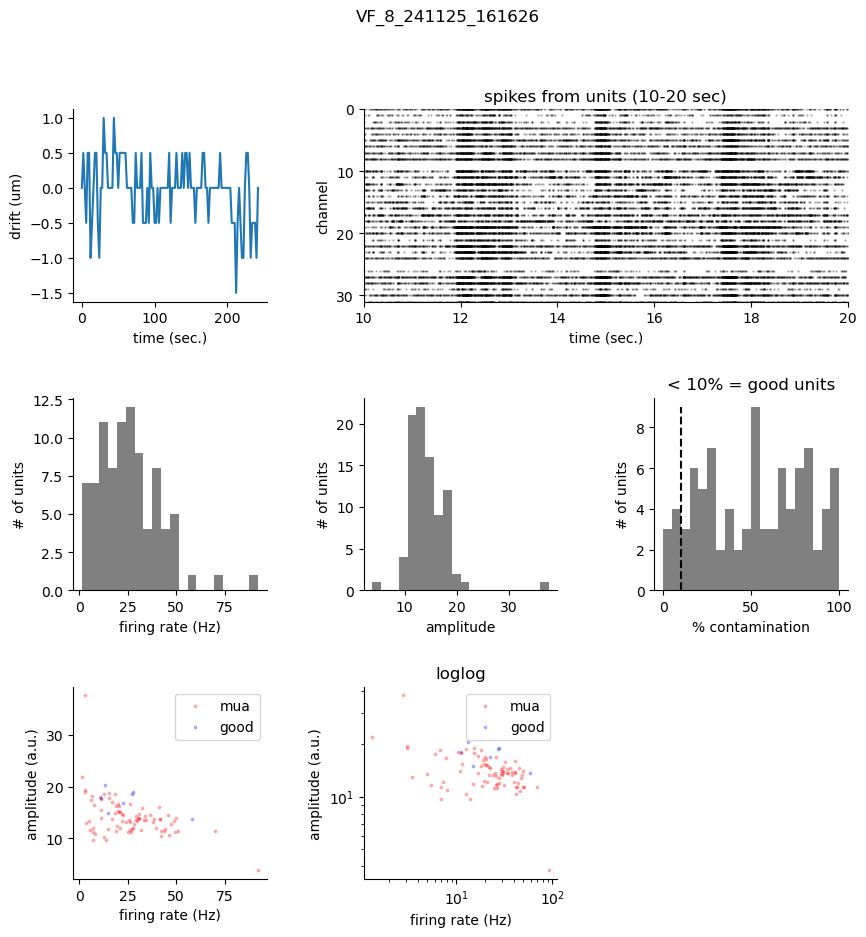

ERROR: could not plot units for VF_8_241125_161626, good. skipping plot...
ERROR: could not plot units for VF_8_241125_161626, mua. skipping plot...


<Figure size 1800x450 with 0 Axes>

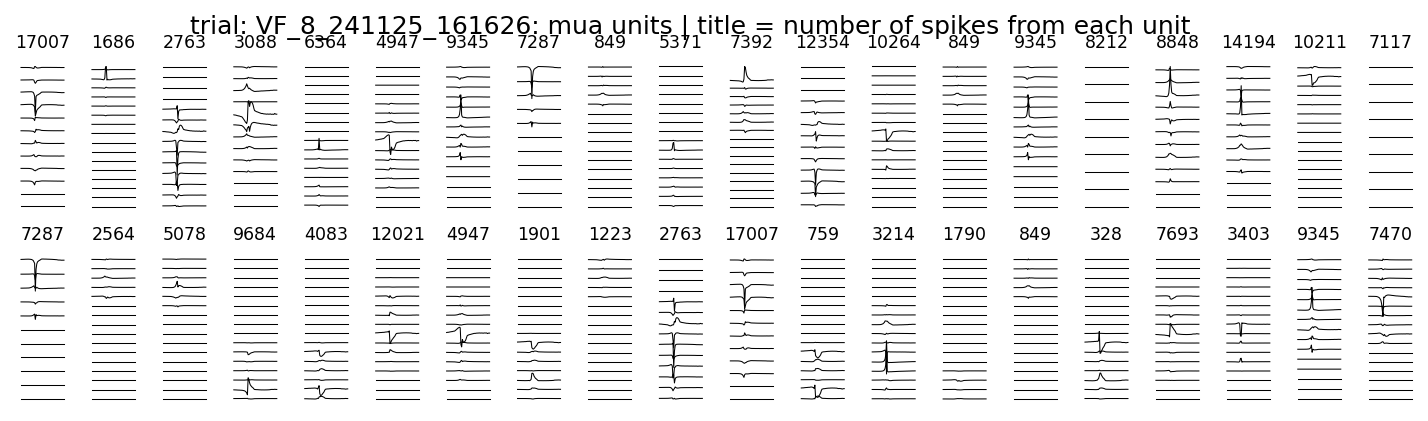

In [11]:
spikes = Kilosort_wrapper(SAVE_DIRECTORY, PROBE_DIRECTORY)
spikes.run_kilosort_trial_summary()